In [1]:
from typing_extensions import TypedDict

In [4]:
class State(TypedDict):
    graph_state:str

In [5]:
def node1(state):
    print("Inside node1")
    return {"graph_state":state['graph_state']+" Hi, this is first node."}

def node2(state):
    print("Inside node2")
    return {"graph_state":state['graph_state']+" Now in second node."}

def node3(state):
    print("Inside node3")
    return {"graph_state":state['graph_state']+" Now in third node."}

In [24]:
import random
from typing import Literal

def decide_node(state)->Literal["node2","node3"]:
    graph_state = state['graph_state']

    if random.random()<0.5:
        return 'node2'
    
    return 'node3'


## Graph

In [29]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

builder = StateGraph(State)
builder.add_node("node1",node1)
builder.add_node("node2",node2)
builder.add_node("node3",node3)

In [30]:
builder.add_edge(START,"node1")
builder.add_conditional_edges("node1",decide_node)
builder.add_edge("node2",END)
builder.add_edge("node3",END)

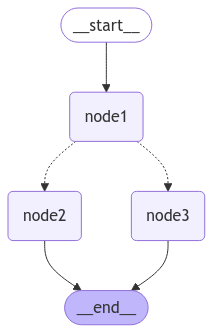

In [31]:
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [35]:
graph.invoke({"graph_state":"Hi"})

Inside node1
Inside node2


{'graph_state': 'Hi Hi, this is first node. Now in second node.'}

## Basic Chatbot


In [38]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


In [40]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [41]:
import os
from dotenv import load_dotenv

load_dotenv()
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [42]:
from langchain_groq import ChatGroq
llm = ChatGroq(model="gemma2-9b-it")

In [43]:
def ChatBot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

In [44]:
builder = StateGraph(State)

In [45]:

builder.add_node("chatbot",ChatBot)
builder.add_edge(START,"chatbot")
builder.add_edge("chatbot",END)
graph = builder.compile()

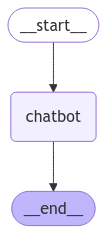

In [48]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [49]:
graph.invoke({"messages":"Hi"})

{'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='e615db65-1a64-4881-ba56-e3ba1add7d84'),
  AIMessage(content='Hi! 👋  How can I help you today?\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 11, 'total_tokens': 25, 'completion_time': 0.025454545, 'prompt_time': 0.002012686, 'queue_time': 0.031961671, 'total_time': 0.027467231}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-b92a8bf5-4f27-4171-a8b7-d857ddd1c5fc-0', usage_metadata={'input_tokens': 11, 'output_tokens': 14, 'total_tokens': 25})]}

In [50]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

In [51]:
while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

Assistant: Hi! 👋  How can I help you today? 😊

Assistant: Langgraph is a **powerful open-source library for working with large language models (LLMs)**. It was developed by the HuggingFace team and is designed to simplify the process of **fine-tuning, evaluating, and deploying LLMs**.

Here are some key features of Langgraph:

* **Simplified fine-tuning:** Langgraph provides a user-friendly API for fine-tuning LLMs on custom datasets, making it easier for developers to adapt these powerful models to specific tasks.
* **Comprehensive evaluation tools:** The library offers a suite of tools for evaluating the performance of LLMs on various benchmarks and tasks, allowing researchers and developers to accurately assess the capabilities of their models.
* **Efficient deployment:** Langgraph facilitates the deployment of fine-tuned LLMs in production environments, enabling seamless integration into real-world applications.
* **Strong community support:** As an open-source project, Langgraph b